In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import transforms

from module import GenSMOTE
from torch.utils.data import Dataset, DataLoader
from dataloader import build_dataloader, GenImageDataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
dataset = GenImageDataset('../dataset/final_malaria_full_class_classification/train_annotation.txt',
                '../dataset/final_malaria_full_class_classification',
                transform=transform,
                minor_classes=[0, 1, 2, 3],
                remove_major=True)


In [3]:
ckpt = torch.load('../work_dirs/kaggle_gen_smote_result/best.pt', map_location=device)

C:\Users\ABC\AppData\Local\Temp\ipykernel_25656\2619275221.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load('../work_dirs/kaggle_gen_smote_result/best.p

In [4]:
model = GenSMOTE(ckpt['args'])
model.load_state_dict(ckpt['model'])
model.to(device)

GenSMOTE(
  (encoder): Encoder(
    (embed): Embedding(7, 128)
    (conv): Sequential(
      (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): LeakyReLU(negative_slope=0.2, inplace=True)
      (2): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): LeakyReLU(negative_slope=0.2, inplace=True)
      (5): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (6): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (7): LeakyReLU(negative_slope=0.2, inplace=True)
      (8): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (9): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): LeakyReLU(negative_slope=0.2, inplace=True)
      (11): Conv2d(1024, 2048, kernel_size=(4, 4), s

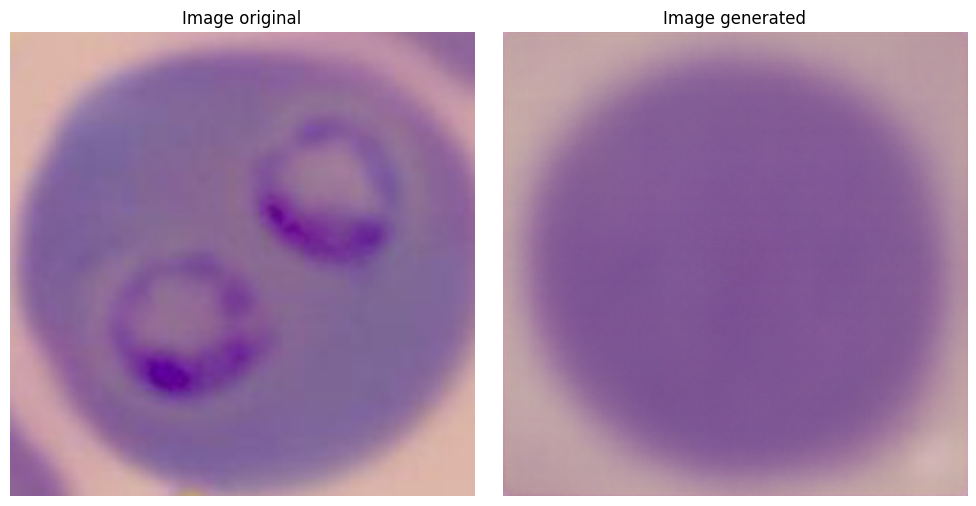

In [5]:
model.eval()

image, label = dataset[0]
label = torch.tensor(label)

image = image.unsqueeze(0).to(device)
label = label.unsqueeze(0).to(device)

gen_image = model(image, label)

image_numpy = image.squeeze().cpu().permute(1, 2, 0).numpy()
gen_image_numpy = gen_image.squeeze().cpu().detach().permute(1, 2, 0).numpy()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 hàng, 2 cột

# Hiển thị ảnh đầu tiên
axs[0].imshow(image_numpy)
axs[0].axis('off')  # Tắt trục
axs[0].set_title("Image original")

# Hiển thị ảnh thứ hai
axs[1].imshow(gen_image_numpy)
axs[1].axis('off')  # Tắt trục
axs[1].set_title("Image generated")

# Hiển thị plot
plt.tight_layout()
plt.show()